<a href="https://colab.research.google.com/github/JaredGlaub/RandomForestRegressions/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practical Machine Learning
### Assignment 5: Principal Components Analysis

Description:
You will compete in the Kaggle.com Digit Recognizer competition which involves classical digit recognition from hand-written images. https://www.kaggle.com/c/digit-recognizer/ 

Read the competition rules, and download the MNIST training and test set data (data consist of 70,000 observations. Utilize the first 60,000 as a model development set and the final 10,000 as a holdout test set).This binary classification task is NOT what is required for the current assignment. In this assignment we are asking for a multiclass classifier. The entire MNIST data set will be used for input data. For this assignment, you will develop a classifier that may be used to predict which of the 10 digits is being written.  


(1) Begin by fitting a random forest classifier using the full set of 784 explanatory variables and the model training set (train.csv). Record the time it takes to fit the model and then evaluate the model on the test.csv data by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.

(2) Execute principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanatory variables. The number of principal components in the solution should be substantially fewer than the 784 explanatory variables. Record the time it takes to identify the principal components.

(3) Using the identified principal components from step (2), use the train.csv to build another random forest classifier. Record the time it takes to fit the model and to evaluate the model on the test.csv data by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.

(4) Submit both the RF Classifier and the PCA RF Classifier to Kaggle.com, and report both scores along with your user name.  I MUST have your user name to verify submission status.

(5) The experiment we have proposed has a MAJOR design flaw. Identify the flaw. Fix it. Rerun the experiment in a way that is consistent with a training-and-test regimen, and submit this to Kaggle.com. Provide your Kaggle.com score and user ID.

(6)  Use k-means clustering to group MNIST observations into 1 of 10 categories and then assign labels.  (Follow the example here if needed: kmeans mnist.pdf (https://canvas.northwestern.edu/courses/128453/files/10242982/download?wrap=1)


Report total elapsed time measures for the training set analysis.  It is sufficient to run a single time-elapsed test for this assignment. In practice, we might consider the possibility of repeated executions of the relevant portions of the programs, much as the Benchmark Example programs do. Some code that might help you with reporting elapsed total time follows. 

start=datetime.now()
rf2.fit(trainimages,labels)
end=datetime.now()
print(end-start)

Relevant scikit-learn documentation includes:
- Random Forest Classifier(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- Metrics Classification Report(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
- Plot Digits Classification(https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py)
- Sklearn Decomposition(https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

(Optional reading) If you want to learn about the time it takes to execute individual functions or code segments within Python, this article demonstrates a variety of ways to do it (https://www.sicara.ai/blog/2017-09-12-surgical-time-tracking-Python).

Regarding the F1 score and the evaluation of multiclass classifiers, refer to the literature on information retrieval. See pages 142–145 of this classic reference:
Manning, C. D., Raghaven, P., & Schutze, H. (2008). Introduction to information retrieval. Cambridge, UK: Cambridge University Press. [ISBN-13: 978-0521865715]

Or see pages 154–158 of the free online version of the book here (https://nlp.stanford.edu/IR-book/pdf/irbookonlinereading.pdf). 

Additional information about this book is available online here (https://nlp.stanford.edu/IR-book/information-retrieval-book.html).

 

Programming Notes
One of the key parameters in setting up random forests is the number of explanatory variables to include in the individual trees. For this classification problem, I would suggest that we follow the advice of Müller and Guido (2017) and use max_features = 'sqrt' .

Regarding the other meta-parameters ...  ensure that bootstrap = True and, given the large number of observations, we might as well keep the default value of n_estimators = 10.

Müller, A. C., & Guido, S. (2017). Introduction to machine learning with Python: A guide for data scientists. Sebastopol, CA: O’Reilly. [ISBN-13: 978-1449369415]. Code examples here (https://github.com/amueller/introduction_to_ml_with_python.).

Another useful reference that discusses the MNIST data set and principal components analysis is:
VanderPlas, J. (2017). Python data science handbook: Essential tools for working with data. Sebastopol, CA: O’Reilly [ISBN-13: 978-1491912058]. Python code examples here (https://github.com/jakevdp/PythonDataScienceHandbook). 

 

Management Problem
From a management perspective, the predictive accuracy of models must be weighed against the costs of model development and implementation. Suppose you were the manager of a data science team responsible for implementing models for computer vision (classification of images analogous to the MINST problem). Would you recommend using PCA as a preliminary to machine learning classification? Explain your thinking.

Grading Guidelines (50 points)
- (1) Data preparation, exploration, visualization (10 points)
- (2) Review research design and modeling methods (10 points)
- (3) Review results, evaluate models (10 points)
- (4) Implementation and programming (10 points)
- (5) Exposition, problem description, and management recommendations (10 points)

 
Deliverables and File Formats
Provide a double-spaced paper with a two-page maximum for the text. The paper should include all a discussion of all graded elements but focus particularly on insights. Include your Python code and output as an appendix. Upload this as a single .pdf file.

Formatting Python Code
Refer to Google's Python Style Guide (https://google.github.io/styleguide/pyguide.html) for ideas about formatting Python code
Comment often and in detail, highlighting major sections of code, describing the thinking behind the modeling and programming methods being employed.

The purpose of this assignment is to assess the effectiveness of PCA.
2 types of muti-class classifier to predict which of the ten digits is being written　by using MNIST data set are to be developed for this assigment. One model is built by original MNIST data set, the other model is built by principle components as reduced explanatory variables.Elapsed time for each process are recorded and compared each other as benchmarking to assess effectiveness of applying PCA. 

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%matplotlib inline

# import base packages into the namespace for this program
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import os
import subprocess

#SKlearn
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA, SparsePCA, MiniBatchSparsePCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

import seaborn as sns; sns.set(style='white')
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 85

In [ ]:
# Get MNIST Data Set  ( https://github.com/ageron/handson-ml/issues/301#issuecomment-448853256 )
# The issue of obtaining MNIST data is solved by following "https://github.com/ageron/handson-ml/issues/143".
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
# mnist

##### (1) Begin by fitting a random forest classifier using the full set of 784 explanatory variables and the model development set of 60,000 observations. Record the time it takes to fit the model and evaluate the model on the holdout data. Assess classification performance using the F1 score, which is the harmonic mean of precision and recall.

In [ ]:
#Split training data (60,000) and test data (10,000)
split = 60000
X_train, X_test = mnist["data"][:split], mnist["data"][split:]
y_train, y_test = mnist["target"][:split], mnist["target"][split:]

In [ ]:
# Check the shape of the trainig data set array
print('Shape of X_train_data:', X_train.shape, X_test.shape)
print('Shape of y_train_data:', y_train.shape, y_test.shape)

Shape of X_train_data: (60000, 784) (10000, 784)
Shape of y_train_data: (60000,) (10000,)


In [ ]:
# X_train
# X_train_PCA #all non-zero columns, so loss of columns not that useful

In [ ]:
# Shuffle the training set so that all cross-validation folds will be similar.
shuffle = np.random.permutation(split)
X_train, y_train = X_train[shuffle], y_train[shuffle]

In [ ]:
#RANDOM FOREST with MNIST data set (no PCA)
start_RF = time.clock() #Record start time of RANDOM FOREST Process

RF_clf = RandomForestClassifier(
  bootstrap = True,
  n_estimators=10,
  max_features='sqrt', 
  random_state=RANDOM_SEED
)
RF_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=85, verbose=0,
                       warm_start=False)

In [ ]:
# Evaluate a score of RANDOM FOREST by cross-validation
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
print(cross_val_score(
  RF_clf, 
  X_test, y_test, 
  cv=10, 
  scoring='f1_macro'
))

[0.89769205 0.84517996 0.89344755 0.8767158  0.8778325  0.9304023
 0.91656575 0.92699056 0.95049895 0.9092583 ]


In [ ]:
#Generate cross-validated estimates for each input data point
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html
y_pred = cross_val_predict(
  RF_clf,
  X_test, y_test,
  cv=10
)

# Show Precision, Recall and F1-Score
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       980
           1       0.94      0.98      0.96      1135
           2       0.89      0.91      0.90      1032
           3       0.85      0.90      0.87      1010
           4       0.88      0.92      0.90       982
           5       0.89      0.84      0.86       892
           6       0.93      0.92      0.93       958
           7       0.93      0.90      0.92      1028
           8       0.91      0.83      0.87       974
           9       0.90      0.85      0.87      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
# Calcurate Average F1 Score
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
f1score_RF_clf = f1_score(y_test, y_pred, average='macro')
f1score_RF_clf

0.9027042584259733

In [ ]:
#Elapsed Time to perform Random Forest
stop_RF = time.clock()
time_RF = stop_RF - start_RF

print('Start time for Random Forest:', start_RF)
print('End_time for Random Forest:', stop_RF)
print('Runtime for Random Forest:', time_RF)

Start time for Random Forest: 88.59618
End_time for Random Forest: 105.880762
Runtime for Random Forest: 17.284582


In [ ]:
#Confusion Matrix for RANDOM FOREST with MNIST data set (no PCA)
cm_RF_clf = confusion_matrix(y_test, y_pred)
cm_RF_clf

array([[ 955,    1,    0,    2,    0,    6,    8,    2,    6,    0],
       [   0, 1117,    6,    2,    0,    2,    3,    0,    4,    1],
       [  15,    3,  937,   13,   15,    4,   15,   15,   10,    5],
       [   3,    6,   28,  905,    1,   23,    3,    8,   25,    8],
       [   3,    3,    7,    5,  905,    3,    9,    2,    6,   39],
       [  16,    8,    5,   69,    8,  745,   11,    6,   13,   11],
       [  16,    6,   13,    5,   10,   17,  882,    1,    8,    0],
       [   5,   16,   25,    7,   17,    2,    1,  927,    2,   26],
       [   5,   18,   27,   39,   13,   25,   14,   12,  811,   10],
       [  11,    8,    9,   17,   58,   13,    1,   22,   11,  859]])

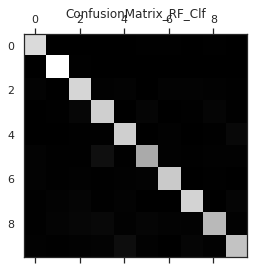

In [ ]:
# Show Confusion Matrix Plot for RANDOM FOREST with MNIST data set (no PCA)
plt.matshow(cm_RF_clf, cmap=plt.cm.gray)
plt.title('ConfusionMatrix_RF_Clf')
plt.show()

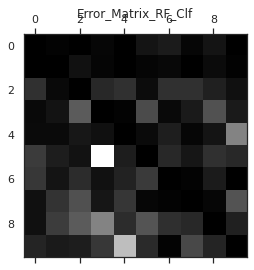

In [ ]:
# Show Error Plot for RANDOM FOREST with MNIST data set (no PCA) 
rws = cm_RF_clf.sum(axis=1, keepdims=True)
norm = cm_RF_clf / rws

np.fill_diagonal(norm, 0)
plt.matshow(norm, cmap=plt.cm.gray)
plt.title('Error_Matrix_RF_Clf')
plt.show()

In [ ]:
#Record start time of PCA processing
start_PCA = time.clock() 

X = mnist.data
y = mnist.target
y = y.astype(int)

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
#Set PCA with 95% variation
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_scaled)
print("pca variance", sum(pca.explained_variance_ratio_ * 100))

pca variance 95.00311796713804


In [ ]:
# print(X_spca.shape)
print(X_reduced.shape)

(70000, 332)


In [ ]:
X_reduced.shape #332 components to reach 95% variability captured

#create new dataframe with 332 columns instead of original 784
mnist_condensed = pd.DataFrame(X_reduced)
mnist_condensed['target'] = y
mnist_condensed.shape

(70000, 333)

Projecting 784-dimensional data to 2D


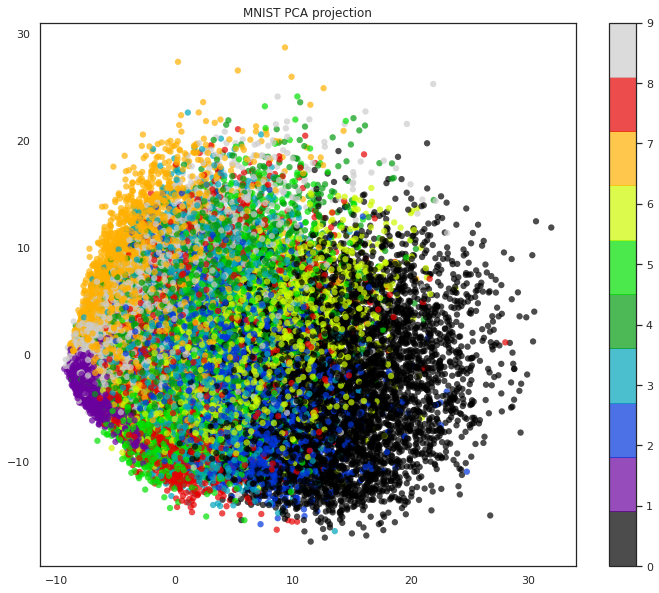

In [ ]:
print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST PCA projection');

Text(0, 0.5, 'variance explained')

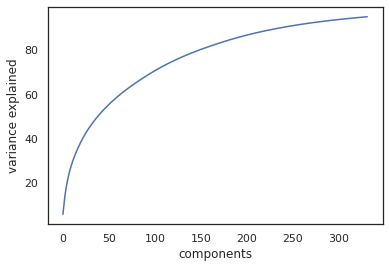

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("components")
plt.ylabel("variance explained")

In [ ]:
from inflect import engine
p = engine()
print("Previous components added to find total variance so far")
print("-------------------------------------------------------")
for i in range(10):
  print("variance explained by", p.ordinal(i+1), "component",round(np.cumsum(pca.explained_variance_ratio_*100)[i]), "%")
print("-------------------------------------------------------")
print("variance explained by", p.ordinal(50), "component",round(np.cumsum(pca.explained_variance_ratio_*100)[50]), "%")
print("variance explained by", p.ordinal(100), "component",round(np.cumsum(pca.explained_variance_ratio_*100)[100]), "%")
print("variance explained by", p.ordinal(200), "component",round(np.cumsum(pca.explained_variance_ratio_*100)[200]), "%")

Previous components added to find total variance so far
-------------------------------------------------------
variance explained by 1st component 6 %
variance explained by 2nd component 10 %
variance explained by 3rd component 13 %
variance explained by 4th component 16 %
variance explained by 5th component 19 %
variance explained by 6th component 21 %
variance explained by 7th component 23 %
variance explained by 8th component 25 %
variance explained by 9th component 26 %
variance explained by 10th component 28 %
-------------------------------------------------------
variance explained by 50th component 55 %
variance explained by 100th component 71 %
variance explained by 200th component 87 %


In [ ]:
X_PCA = mnist_condensed.loc[:, mnist_condensed.columns != 'target']
# print(len(mnist_condensed.columns))
y_PCA = mnist_condensed.iloc[:, -1:]
# y = mnist_condensed.loc[:, mnist_condensed.columns == 'target']

#Split training data (60,000) and test data (10,000)
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, y, test_size=1/7, random_state=RANDOM_SEED)

# Check the shape of the trainig data set array
print('Shape of X_train_data:', X_train_PCA.shape, X_test_PCA.shape)
print('Shape of y_train_data:', y_train_PCA.shape, y_test_PCA.shape)
y_train_PCA, y_test_PCA = y_train_PCA.flatten(), y_test_PCA.flatten()
print('Shape of y_train_data:', y_train_PCA.shape, y_test_PCA.shape)

Shape of X_train_data: (60000, 332) (10000, 332)
Shape of y_train_data: (60000,) (10000,)
Shape of y_train_data: (60000,) (10000,)


In [ ]:
# type(y_PCA)
# type(y_train)
# y_train_PCA,y_test_PCA = y_train_PCA.values.astype('object'), y_test_PCA.values.astype('object')
# print('Shape of y_train_data:', y_train_PCA.shape, y_test_PCA.shape, y_train.shape)
# y_train
# y_train_PCA.astype('object').shape

In [ ]:
# Shuffle the training set so that all cross-validation folds will be similar.
#RANDOM FOREST with MNIST data set (no PCA)
start_RF_PCA = time.clock() #Record start time of RANDOM FOREST Process

RF_clf_PCA = RandomForestClassifier(
  bootstrap = True,
  n_estimators=10,
  max_features='sqrt', 
  random_state=RANDOM_SEED,
  n_jobs = -1
)
RF_clf_PCA.fit(X_train_PCA, y_train_PCA)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=85, verbose=0,
                       warm_start=False)

In [ ]:
#Generate cross-validated estimates for each input data point
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html
y_pred_PCA = cross_val_predict(
  RF_clf,
  X_test_PCA, y_test_PCA,
  cv=10
)

# Show Precision, Recall and F1-Score
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print(classification_report(y_test_PCA, y_pred_PCA))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       940
           1       0.94      0.97      0.96      1079
           2       0.71      0.78      0.74       970
           3       0.72      0.77      0.74      1003
           4       0.78      0.82      0.80      1009
           5       0.78      0.70      0.74       943
           6       0.89      0.87      0.88      1020
           7       0.86      0.82      0.84      1029
           8       0.81      0.68      0.74       995
           9       0.82      0.74      0.78      1012

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.80     10000
weighted avg       0.81      0.81      0.81     10000



In [ ]:
#Record end time of PCA processing
#Elapsed Time to perform Random Forest
stop_RF_PCA = time.clock()
time_RF_PCA = stop_RF_PCA - start_RF_PCA

print('Start time for Random Forest:', start_RF_PCA)
print('Runtime for Random Forest:', time_RF_PCA)
print('Runtime for PCA Random Forest:', time_RF_PCA, 'Runtime for Standard Random Forest:', time_RF)
# PCA creates dense expressions that take longer to process than original, so use sparce PCA

Start time for Random Forest: 136.737093
Runtime for Random Forest: 42.73038700000001
Runtime for PCA Random Forest: 42.73038700000001 Runtime for Standard Random Forest: 17.284582



#### Kaggle Submission: 

In [ ]:
#S2 Mount Google Drive to Colab Enviorment
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#S3 Establish working directory

import os # Operation System
os.getcwd()
%cd /content/gdrive/MyDrive/422Data
!pwd
!ls
print('Working Directory')
print(os.getcwd())
work_dir = "/content/gdrive/MyDrive/422Data"

/content/gdrive/MyDrive/422Data
/content/gdrive/MyDrive/422Data
bank.csv			results_knn_mb.csv	     test.csv
boston.csv			results_knn_pca.csv	     titanic
MSDS422_covid19_20200825v3.csv	results_RF_basic.csv	     train.csv
plot-corr-map.pdf		sample_submission.csv
results.csv			studenmunds_restaurants.csv
Working Directory
/content/gdrive/MyDrive/422Data


In [ ]:
# read data for the MNIST Kaggle Competition
# creating data frame restdata
train = pd.read_csv(work_dir + '/train.csv')
test = pd.read_csv(work_dir+'/test.csv')


# check the pandas DataFrame object boston_input
print('\nMNIST DataFrame (first and last five rows):')
print(train.head())
print(test.head())


MNIST DataFrame (first and last five rows):
   label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]
   pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0       0       0       0       0  ...         0         0         0         0
1       0       0       0       0  ...         0         0         0         0
2       0       0       0       0  ...         0         0         0         0
3       0       0       0       0  ...         0         0         0         0
4       0       0       0       0  ...         0         0         0

In [ ]:
target = train["label"]
train = train.drop("label",1)

In [ ]:
# train.head()

In [ ]:
#tradition PCA 50 components
pca = PCA(n_components=50)
pca.fit(train)
transform_train = pca.transform(train)
transform_test = pca.transform(test)

# MBsparsePCA to reduce runtime
MBsparsePCA = MiniBatchSparsePCA(n_components=5, batch_size=50, 
                               random_state=RANDOM_SEED)
MBsparsePCA.fit(train)
MBsparse_transform_train = MBsparsePCA.transform(train)
MBsparse_transform_test = MBsparsePCA.transform(test)

In [ ]:
clf = RandomForestClassifier(n_estimators = 100, n_jobs=1, criterion="gini")
clf.fit(MBsparse_transform_train, target)
results=clf.predict(MBsparse_transform_test)

In [ ]:
y_pred = cross_val_predict(
  clf,
  X_test, y_test,
  cv=10
)

# Show Precision, Recall and F1-Score
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.94      0.94      0.94      1032
           3       0.94      0.94      0.94      1010
           4       0.95      0.95      0.95       982
           5       0.95      0.92      0.94       892
           6       0.96      0.97      0.97       958
           7       0.95      0.94      0.95      1028
           8       0.94      0.93      0.93       974
           9       0.93      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [ ]:
# Shuffle the training set so that all cross-validation folds will be similar.
#RANDOM FOREST with MNIST data set
start_RF_MB_PCA = time.clock() #Record start time of RANDOM FOREST Process

RF_clf_MB_PCA = RandomForestClassifier(n_estimators = 100, n_jobs=1, criterion="gini")
RF_clf_MB_PCA.fit(MBsparse_transform_train, target)

#Generate cross-validated estimates for each input data point
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html
y_pred_MB = cross_val_predict(
  RF_clf_MB_PCA,
  X_test, y_test,
  cv=10
)

# Show Precision, Recall and F1-Score
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print(classification_report(y_test, y_pred_MB))

#Record end time of PCA processing
#Elapsed Time to perform Random Forest
stop_RF_MB_PCA = time.clock()
time_RF_MB_PCA = stop_RF_MB_PCA - start_RF_MB_PCA

print('Start time for MB PCA Random Forest:', start_RF_MB_PCA)
print('End time for MB PCA Random Forest:', stop_RF_MB_PCA)
print('Runtime for MB PCA Random Forest:', time_RF_MB_PCA, 'Runtime for Standard Random Forest:', time_RF)
# PCA creates dense exprecession that take longer to process than original, so use sparce PCA

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.94      0.94      0.94      1032
           3       0.93      0.94      0.94      1010
           4       0.95      0.95      0.95       982
           5       0.95      0.91      0.93       892
           6       0.96      0.96      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.94      0.93      0.94       974
           9       0.93      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

Start time for MB PCA Random Forest: 300.540807
End time for MB PCA Random Forest: 367.518287
Runtime for MB PCA Random Forest: 66.97748000000001 Runtime for Standard Random Forest: 17.284582


In [ ]:
start_KNN_MB_PCA = time.clock()

clf = KNeighborsClassifier()
clf.fit(MBsparse_transform_train, target)
results=clf.predict(MBsparse_transform_test)

y_pred_KNN_MB = cross_val_predict(
  RF_clf_MB_PCA,
  X_test, y_test,
  cv=10
)

print(classification_report(y_test, y_pred_KNN_MB))

#Record end time of PCA processing
#Elapsed Time to perform Random Forest
stop_KNN_MB_PCA = time.clock()
time_KNN_MB_PCA = stop_KNN_MB_PCA - start_KNN_MB_PCA

print('Start time for MB PCA KNN:', start_KNN_MB_PCA)
print('End time for MB PCA KNN:', stop_KNN_MB_PCA)
print('Runtime for MB PCA KNN:', time_KNN_MB_PCA, 'Runtime for Standard Random Forest:', time_RF)
# PCA creates dense exprecession that take longer to process than original, so use sparce PCA

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.94      0.94      0.94      1032
           3       0.93      0.94      0.93      1010
           4       0.95      0.96      0.96       982
           5       0.96      0.91      0.94       892
           6       0.96      0.97      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.94      0.93      0.93       974
           9       0.93      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

Start time for MB PCA KNN: 367.53825
End time for MB PCA KNN: 422.978211
Runtime for MB PCA KNN: 55.43996099999998 Runtime for Standard Random Forest: 17.284582


In [ ]:
# random forest classification
start = time.clock()

clf = RandomForestClassifier(n_estimators = 100, n_jobs=1, criterion="gini")
clf.fit(train, target)
results_rf =clf.predict(test)

#time
stop = time.clock()
end = stop - start
print('Runtime for RF:', end)

Runtime for RF: 34.39495699999998


In [ ]:
np.savetxt('results_RF_basic.csv', 
           np.c_[range(1,len(test)+1),results_rf], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

In [ ]:
# random forest classification with PCA

#time
start = time.clock()

clf = RandomForestClassifier(n_estimators = 100, n_jobs=1, criterion="gini")
clf.fit(transform_train, target)
results_rf_pca=clf.predict(transform_test)

stop = time.clock()
end = stop - start
print('Runtime for RF_PCA:', end)

Runtime for RF_PCA: 47.13673


In [ ]:
np.savetxt('results_rf_pca.csv', 
           np.c_[range(1,len(test)+1),results_rf_pca], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

In [ ]:
# random forest classification with MiniBatchSparsePCA

MBsparsePCA = MiniBatchSparsePCA(n_components=5, batch_size=50, 
                               random_state=RANDOM_SEED)
MBsparsePCA.fit(train)
MBsparse_transform_train = MBsparsePCA.transform(train)
MBsparse_transform_test = MBsparsePCA.transform(test)

#time

start = time.clock()

clf = RandomForestClassifier(n_estimators = 100, n_jobs=1, criterion="gini")
clf.fit(MBsparse_transform_train, target)
results=clf.predict(MBsparse_transform_test)

stop = time.clock()
end = stop - start
print('Runtime for RF_MBPCA:', end)

Runtime for RF_MBPCA: 13.363511000000017


In [ ]:
np.savetxt('results_RF_MBPCA.csv', 
           np.c_[range(1,len(test)+1),results], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

In [ ]:
# KNN classification

start = time.clock()

knn_clf = KNeighborsClassifier()
knn_clf.fit(train, target)
results = knn_clf.predict(test)

stop = time.clock()
end = stop - start
print('Runtime for KNN:', end)

#over 30 minutes

In [ ]:
np.savetxt('results_KNN_basic.csv', 
           np.c_[range(1,len(test)+1),results], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

In [ ]:
# KNN with PCA

start = time.clock()

knn_clf_PCA = KNeighborsClassifier()
knn_clf_PCA.fit(transform_train, target)
results=knn_clf_PCA.predict(transform_test)

stop = time.clock()
end = stop - start
print('Runtime for KNN_PCA:', end)

In [ ]:
np.savetxt('results_knn_pca.csv', 
           np.c_[range(1,len(test)+1),results], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

In [ ]:
# KNN with MiniBatchSparsePCA

start = time.clock()

knn_clf_MBPCA = KNeighborsClassifier()
knn_clf_MBPCA.fit(MBsparse_transform_train, target)
results=knn_clf_MBPCA.predict(MBsparse_transform_test)

stop = time.clock()
end = stop - start
print('Runtime for KNN_MB:', end)

Runtime for KNN_MB: 1.3663450000000097


In [ ]:
np.savetxt('results_knn_mb.csv', 
           np.c_[range(1,len(test)+1),results], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')